In [3]:
#import polyline
import matplotlib.pyplot as plt
import xml.etree.ElementTree as et
import pandas as pd
import geopandas as gp
import maup

In [4]:
import geopandas as gpd
from shapely.geometry import Polygon
import polyline
import pandas as pd

In [5]:
gdf = gp.read_file("/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Madison_County_AL_06_23_25/madison_precs.geojson")

In [6]:
z=[]

xtree = et.parse("./madison_2018.xml")
xroot = xtree.getroot()
store_list = []
county_area = xroot.findall(".//Region")
for i in county_area:
    county = i.text
contests = xroot.findall(".//Contest")
for i in contests:
    contest = i.attrib.get('text')
    lower = i.findall("./Choice")
    for j in lower:
        choice = j.attrib.get('text')
        lower_2 = j.findall("./VoteType")
        for k in lower_2:
            voting_method = k.attrib.get('name')
            lower_3 = k.findall("./Precinct")
            for l in lower_3:
                precinct_name = l.attrib.get('name')
                num_votes = l.attrib.get('votes')
                z.append([county,contest,choice,voting_method,precinct_name,num_votes])
dfcols = ['county','contest','choice','voting_method','precinct','num_votes']
df_general = pd.DataFrame(z,columns=dfcols)

In [7]:
df_general["contest"].unique()

array(['STRAIGHT PARTY VOTING', 'GOVERNOR', 'LIEUTENANT GOVERNOR',
       'UNITED STATES REPRESENTATIVE, 5TH CONGRESSIONAL DISTRICT',
       'ATTORNEY GENERAL', 'STATE SENATOR, DISTRICT NO. 1',
       'STATE SENATOR, DISTRICT NO. 2', 'STATE SENATOR, DISTRICT NO. 3',
       'STATE SENATOR, DISTRICT NO. 7', 'STATE SENATOR, DISTRICT NO. 8',
       'STATE SENATOR, DISTRICT NO. 9',
       'STATE REPRESENTATIVE, DISTRICT NO. 6',
       'STATE REPRESENTATIVE, DISTRICT NO. 10',
       'STATE REPRESENTATIVE, DISTRICT NO. 19',
       'STATE REPRESENTATIVE, DISTRICT NO. 20',
       'STATE REPRESENTATIVE, DISTRICT NO. 21',
       'STATE REPRESENTATIVE, DISTRICT NO. 22',
       'STATE REPRESENTATIVE, DISTRICT NO. 25',
       'STATE REPRESENTATIVE, DISTRICT NO. 53',
       'CHIEF JUSTICE OF THE SUPREME COURT',
       'ASSOCIATE JUSTICE OF THE SUPREME COURT, PLACE NO. 1',
       'ASSOCIATE JUSTICE OF THE SUPREME COURT, PLACE NO. 2',
       'ASSOCIATE JUSTICE OF THE SUPREME COURT, PLACE NO. 3',
      

In [8]:
df_general = df_general[df_general["contest"]=='MADISON COUNTY JUDGE OF PROBATE'].copy()

In [9]:
df_general

,county,contest,choice,voting_method,precinct,num_votes
18435,Madison,MADISON COUNTY JUDGE OF PROBATE,MICHAEL H. WALKER,Election Day,1 - A M University Gym,1008
18436,Madison,MADISON COUNTY JUDGE OF PROBATE,MICHAEL H. WALKER,Election Day,2 - Charles Stone Agricultural Center,370
18437,Madison,MADISON COUNTY JUDGE OF PROBATE,MICHAEL H. WALKER,Election Day,3 - Jackson Way Baptist Church,679
18438,Madison,MADISON COUNTY JUDGE OF PROBATE,MICHAEL H. WALKER,Election Day,4 - First Baptist Church,908
18439,Madison,MADISON COUNTY JUDGE OF PROBATE,MICHAEL H. WALKER,Election Day,5 - Optimist Park,712
...,...,...,...,...,...,...
19114,Madison,MADISON COUNTY JUDGE OF PROBATE,WRITE-IN,Provisional,93 - Harvest Baptist Church,0
19115,Madison,MADISON COUNTY JUDGE OF PROBATE,WRITE-IN,Provisional,ABSENTEE,0
19116,Madison,MADISON COUNTY JUDGE OF PROBATE,WRITE-IN,Provisional,ABSENTEE #2,0
19117,Madison,MADISON COUNTY JUDGE OF PROBATE,WRITE-IN,Provisional,PROVISIONAL #1,0


In [10]:
df_general["num_votes"] = df_general["num_votes"].astype(int)

In [11]:
pivot = pd.pivot_table(df_general, index = "precinct",columns = "choice",values="num_votes",aggfunc=sum)

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_9081/3272482553.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(df_general, index = "precinct",columns = "choice",values="num_votes",aggfunc=sum)


In [12]:
pivot.reset_index(inplace = True, drop = False)

In [13]:
gdf["geometry"] = gdf["geometry"].buffer(0)

In [14]:
gdf.loc[gdf["NAME"].isna()]

,OBJECTID,PRECINCTID,NAME,COUNTY,POLLINGID,CreationDate,Creator,EditDate,Editor,Shape__Area,Shape__Length,geometry
71,72,27,None,None,27,1496256912697,jbritton25,1496258333288,jbritton25,None,None,"POLYGON ((-86.65699 34.77876, -86.65561 34.778..."


In [15]:
gdf.loc[gdf["NAME"].isna(),"NAME"] = "Oakwood University Church"

In [16]:
gdf["join_id"] = gdf["PRECINCTID"].astype(str)+" - " + gdf["NAME"]

In [17]:
join_updates_dict = {'1 - Alabama A&M Univ Gym': '1 - A M University Gym',
 '15 - Willowbrook Bapt Church': '15 - Willowbrook Baptist Church',
 '18 - Whitesburg Baptist Church': '18 - The Whitesburg Center',
 '19 - Weatherly Hieghts Baptist Church': '19 - Weatherly Heights Baptist Church',
 '31 - Fire and Rescue Training Acad': '31 - Fire and Rescue Training Academy',
 '36 - Dr.Richard Showers Center': '36 - Dr. Richard Showers Center',
 '38 - Robert "Bob" Harrison Senior Wellness and Advoca\r\n': '38 - Robert "Bob" Harrison Senior Wellness and Advocacy Center',
 '40 - Lewis Chapel CP Church': '40 - Lewis Chapel C.P. Church',
 '50 - St.Luke Christian Church': '50 - St. Luke Christian Church',
 '53 - Intergraph Building 300': '53 - Intergraph Corporation',
 '58 - Little Indian Creek PB Church': '58 - Little Indian Creek P.B. Church',
 '6 - Northeast Huntsville Training and Conf Center': '6 - Northeast Huntsville Training and Conference Center',
 '61 - Rivertree Church': '61- Rivertree Church',
 '63 - Mad Mission 7th Day Advent Church': '63 - Madison Mission 7th Day Adv. Church',
 '69 - Madison Church Of Christ': '69 - Madison Church of Christ',
 '73 - Plevna /New Market Fire Dept #2': '73 - Plevna/New Market Fire Department',
 '80 - County Commission Dist 1 Office': '80 - County Commission District #1 Office',
 '81 - Bobo Volunteer Fire Dept': '81 - Bobo Volunteer Fire Department',
 '83 - Church Of Christ Meridianville': '83 - Meridianville Church of Christ',
 '84 - Mt Zion Baptist Church': '84 - Mt. Zion Baptist Church',
 "90 - St John's Catholic School": "90 - St. John's Catholic Church"}

In [18]:
gdf["join_id"] = gdf["join_id"].map(join_updates_dict).fillna(gdf["join_id"])

In [19]:
final = gp.GeoDataFrame(pd.merge(pivot,gdf,left_on="precinct",right_on="join_id",how="outer",indicator=True ))


In [20]:
list(final[final["_merge"]!="both"].columns)

['precinct',
 'FRANK BARGER',
 'MICHAEL H. WALKER',
 'WRITE-IN',
 'OBJECTID',
 'PRECINCTID',
 'NAME',
 'COUNTY',
 'POLLINGID',
 'CreationDate',
 'Creator',
 'EditDate',
 'Editor',
 'Shape__Area',
 'Shape__Length',
 'geometry',
 'join_id',
 '_merge']

In [21]:
madison = gp.read_file("./madison_blocks.shp")

In [22]:
final = final[~final["precinct"].isin(["ABSENTEE #2","PROVISIONAL #1","ABSENTEE","PROVISIONAL #2"])]
final.index = final["precinct"]
final = final.to_crs(madison.crs)
final["geometry"] = final["geometry"].buffer(0)
final.drop(["_merge"],axis = 1, inplace = True)

In [23]:
madison["PREC"] = maup.assign(madison,final)

/Users/peterhorton/opt/anaconda3/envs/maup_adv/lib/python3.11/site-packages/maup/intersections.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df = df[df.area > area_cutoff].reset_index(drop=True)
/Users/peterhorton/opt/anaconda3/envs/maup_adv/lib/python3.11/site-packages/maup/intersections.py:48: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
/Users/peterhorton/opt/anaconda3/envs/maup_adv/lib/python3.11/site-packages/maup/assign.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources,

In [24]:
blocks_grouped = madison.dissolve("PREC", aggfunc='sum', as_index = False)
final.reset_index(inplace = True, drop = True)

In [25]:
final = gp.GeoDataFrame(pd.merge(blocks_grouped, final, left_on = "PREC", right_on = "precinct", how = "outer", indicator = True, validate = "1:1"))

In [26]:
final["_merge"].value_counts()

_merge
both          72
left_only      0
right_only     0
Name: count, dtype: int64

In [27]:
apb_cols = ['P0040006',
 'P0040013',
 'P0040018',
 'P0040019',
 'P0040020',
 'P0040021',
 'P0040029',
 'P0040030',
 'P0040031',
 'P0040032',
 'P0040039',
 'P0040040',
 'P0040041',
 'P0040042',
 'P0040043',
 'P0040044',
 'P0040050',
 'P0040051',
 'P0040052',
 'P0040053',
 'P0040054',
 'P0040055',
 'P0040060',
 'P0040061',
 'P0040062',
 'P0040063',
 'P0040066',
 'P0040067',
 'P0040068',
 'P0040069',
 'P0040071',
 'P0040073']

In [28]:
final["TOT_POP"] = final["P0010001"]
final["TOT_VAP"] = final["P0030001"]
final["HIS_VAP"] = final["P0040002"]
final["WHI_VAP_NH"] = final["P0040005"]
final["APB_VAP_NH"] = final[apb_cols].sum(axis = 1)
final["OTH_VAP_NH"] = final["TOT_VAP"] - final["HIS_VAP"] - final["WHI_VAP_NH"] - final["APB_VAP_NH"]

In [29]:
final = gp.GeoDataFrame(final[['PREC','FRANK BARGER',
 'MICHAEL H. WALKER',
 'WRITE-IN','TOT_POP', 'TOT_VAP',
       'HIS_VAP', 'WHI_VAP_NH', 'APB_VAP_NH', 'OTH_VAP_NH','geometry_y' ]])

In [30]:
final.rename(columns = {"geometry_y":"geometry","FRANK BARGER":"F_BARGER","MICHAEL H. WALKER":"M_WALKER"}, inplace = True)

In [31]:
final.to_file("./madison_county_al_judge_2018.shp")

In [45]:
final[[i for i in list(final.columns) if i != "geometry"]].sum()

PREC          1 - A M University Gym10 - Monte Sano Fire Sta...
F_BARGER                                                  72748
M_WALKER                                                  59324
WRITE-IN                                                    111
TOT_POP                                                  388153
TOT_VAP                                                  304143
HIS_VAP                                                   16137
WHI_VAP_NH                                               193636
APB_VAP_NH                                                73421
OTH_VAP_NH                                                20949
dtype: object

In [ ]:
TOT_POP                                                  388153
TOT_VAP                                                  304143
HIS_VAP                                                   16137
WHI_VAP_NH                                               193636
APB_VAP_NH                                                73421
OTH_VAP_NH                                                20949

In [64]:
final.to_csv("./madison_county_al_judge_2018.csv",index = False)

In [67]:
print(75808 - (2287 + 467+ 272 + 34))

print(61980 - (1948+311+372+25))
print(114 - (3))

72748
59324
111


<Axes: >

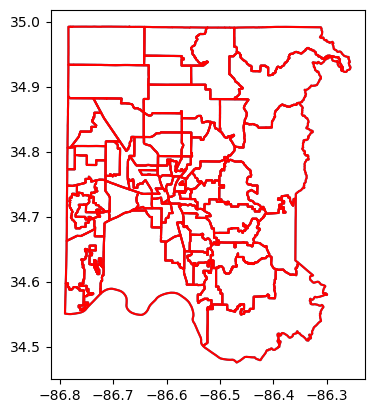

In [32]:
ax = gdf.boundary.plot()
final.boundary.plot(ax = ax, color = "red")